# LIBRARIES

In [48]:
## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Time Series
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from sklearn import linear_model

## Cluster:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import folium

## Model
from sklearn.model_selection import train_test_split

# CLEANING

In [2]:
data=pd.read_csv(r'C:\Users\paul\Documents\Formation Data Analyst\Bootcamp\Final Project\database.csv', sep=';', header=[0])

C:\Users\paul\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.drop(columns=['Nom EPCI', 'Code EPCI'], inplace=True)

In [4]:
data.Année = pd.to_datetime(data.Année, format='%Y')

In [5]:
department = { 
    'Isère': 'Isère',
    'Puy-de-Dôme': 'Puy-de-Dôme',
    'Drôme': 'Drôme',
    'Allier': 'Allier',
    'Ardèche': 'Ardèche',
    'Ain': 'Ain',
    'Loire': 'Loire',
    'Cantal': 'Cantal',
    'Haute-Loire': 'Haute-Loire',
    'Rhône': 'Rhône',
    'Savoie': 'Savoie',
    'Haute-Savoie': 'Haute-Savoie',
    'ISERE': 'Isère',
    'PUY DE DOME': 'Puy-de-Dôme',
    'DROME': 'Drôme',
    'ALLIER': 'Allier',
    'ARDECHE': 'Ardèche',
    'AIN': 'Ain',
    'LOIRE': 'Loire',
    'CANTAL': 'Cantal',
    'HAUTE LOIRE': 'Haute-Loire',
    'RHONE': 'Rhône',
    'SAVOIE': 'Savoie',
    'HAUTE SAVOIE': 'Haute-Savoie'
    }

data['Nom département']=data['Nom département'].map(department)

In [6]:
region = {
    'AUVERGNE RHONE ALPES' : 'Auvergne-Rhône-Alpes',
    'Auvergne-Rhône-Alpes' : 'Auvergne-Rhône-Alpes'
}
data['Nom région']=data['Nom région'].map(region)

In [7]:
geo_shape_missing=data['Geo Shape'].isna().sum()
ratio=geo_shape_missing/len(data)*100
ratio

88.72004560734436

In [8]:
data.drop(columns='Geo Shape', inplace=True)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Année                                                     0
Nom commune                                               0
Code commune                                              0
Type EPCI                                                 0
Nom département                                           0
Code département                                          0
Nom région                                                0
Code région                                               0
Domaine de tension                                        0
Nb sites Photovoltaïque Enedis                            0
Energie produite annuelle Photovoltaïque Enedis (MWh)     0
Nb sites Eolien Enedis                                    0
Energie produite annuelle Eolien Enedis (MWh)             0
Nb sites Hydraulique Enedis                               0
Energie produite annuelle Hydraulique Enedis (MWh)        0
Nb sites Bio Energie Enedis                               0
Energie produite annuelle Bio Energie En

In [11]:
data.shape

(29358, 22)

In [12]:
data[['Lat', 'Lon']] = data['centroid'].str.split(',', expand=True)
data.head()

,Année,Nom commune,Code commune,Type EPCI,Nom département,Code département,Nom région,Code région,Domaine de tension,Nb sites Photovoltaïque Enedis,...,Energie produite annuelle Hydraulique Enedis (MWh),Nb sites Bio Energie Enedis,Energie produite annuelle Bio Energie Enedis (MWh),Nb sites Cogénération Enedis,Energie produite annuelle Cogénération Enedis (MWh),Nb sites Autres filières Enedis,Energie produite annuelle Autres filières Enedis (MWh),centroid,Lat,Lon
2,2015-01-01,Égliseneuve-d'Entraigues,63144,CC,Puy-de-Dôme,63,Auvergne-Rhône-Alpes,84,HTA,0.0,...,805.599,0.0,0.0,0.0,0.0,0.0,0.0,"45.421336485,2.8227848030000002",45.421336485,2.8227848030000002
3,2015-01-01,Pionsat,63281,CC,Puy-de-Dôme,63,Auvergne-Rhône-Alpes,84,BT > 36 kVA,3.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,"46.119767483,2.685022903",46.119767483,2.685022903
4,2015-01-01,Cheyssieu,38101,CC,Isère,38,Auvergne-Rhône-Alpes,84,BT <= 36 kVA,12.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,"45.425566484,4.84259062",45.425566484,4.84259062
6,2015-01-01,Faucigny,74122,CC,Haute-Savoie,74,Auvergne-Rhône-Alpes,84,BT <= 36 kVA,12.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,"46.116129363,6.369052075",46.116129363,6.369052075
7,2015-01-01,Lapeyrouse,63187,CC,Puy-de-Dôme,63,Auvergne-Rhône-Alpes,84,BT > 36 kVA,3.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,"46.231766725,2.878459449",46.231766725,2.878459449


In [13]:
data['Lat'] = data['Lat'].astype('float')
data['Lon'] = data['Lon'].astype('float')

In [14]:
## data.to_excel(r'C:\Users\paul\Downloads\database_clean.xlsx')

In [15]:
data_fixed=data.drop(columns= ['Nom commune', 'Type EPCI', 'Nom département','Nom région', 'Code région','Domaine de tension','Lat','Lon', 'centroid'], axis=True)

In [16]:
data_fixed.index = data_fixed['Année']
data_fixed=data_fixed.drop(columns='Année', axis=0, inplace=False)
data_fixed.head()

,Code commune,Code département,Nb sites Photovoltaïque Enedis,Energie produite annuelle Photovoltaïque Enedis (MWh),Nb sites Eolien Enedis,Energie produite annuelle Eolien Enedis (MWh),Nb sites Hydraulique Enedis,Energie produite annuelle Hydraulique Enedis (MWh),Nb sites Bio Energie Enedis,Energie produite annuelle Bio Energie Enedis (MWh),Nb sites Cogénération Enedis,Energie produite annuelle Cogénération Enedis (MWh),Nb sites Autres filières Enedis,Energie produite annuelle Autres filières Enedis (MWh)
Année,,,,,,,,,,,,,,
2015-01-01,63144,63,0.0,0.000000,0.0,0.0,1.0,805.599,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,63281,63,3.0,697.202009,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,38101,38,12.0,49.984513,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,74122,74,12.0,61.787808,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-01,63187,63,3.0,617.420644,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0


# EDA

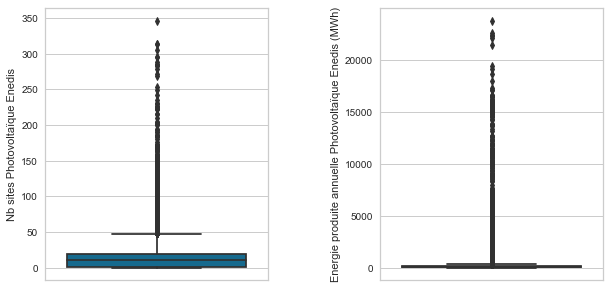

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=data_fixed['Nb sites Photovoltaïque Enedis'], ax=ax[0])
sns.boxplot(y=data_fixed['Energie produite annuelle Photovoltaïque Enedis (MWh)'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

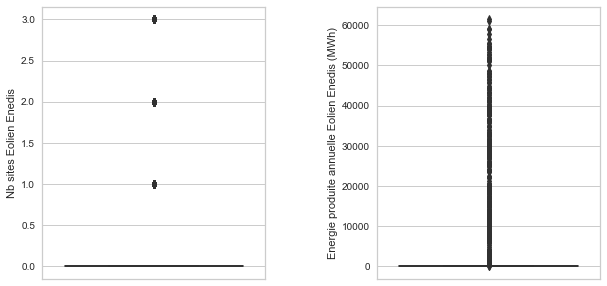

In [19]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=data_fixed['Nb sites Eolien Enedis'], ax=ax[0])
sns.boxplot(y=data_fixed['Energie produite annuelle Eolien Enedis (MWh)'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

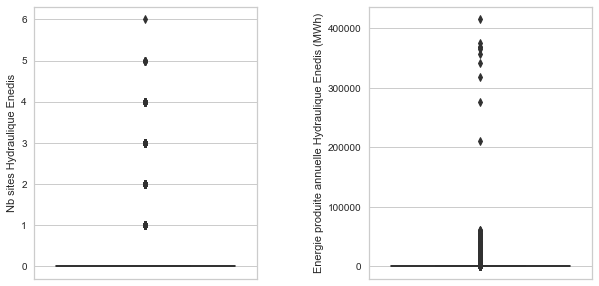

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=data_fixed['Nb sites Hydraulique Enedis'], ax=ax[0])
sns.boxplot(y=data_fixed['Energie produite annuelle Hydraulique Enedis (MWh)'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

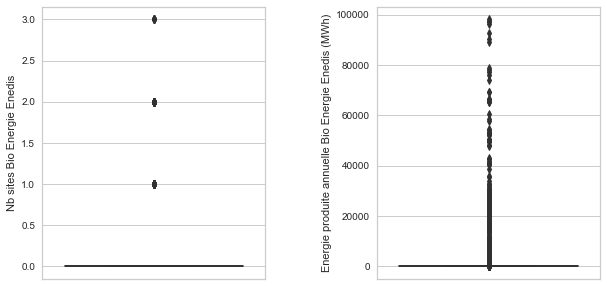

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=data_fixed['Nb sites Bio Energie Enedis'], ax=ax[0])
sns.boxplot(y=data_fixed['Energie produite annuelle Bio Energie Enedis (MWh)'], ax=ax[1])
plt.subplots_adjust(wspace=0.5)

([], [])

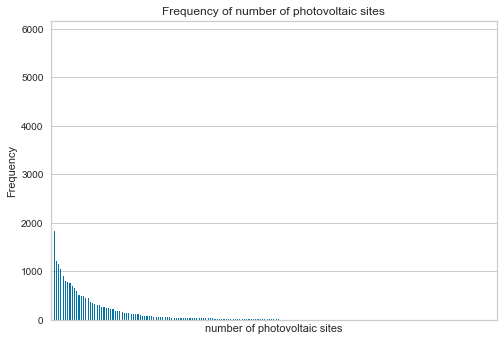

In [22]:
df= data_fixed[data_fixed['Nb sites Photovoltaïque Enedis'] != 0]
frequency = df['Nb sites Photovoltaïque Enedis'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('number of photovoltaic sites')
plt.ylabel('Frequency')
plt.title('Frequency of number of photovoltaic sites')
plt.xticks([])

Text(0.5, 1.0, 'Frequency of the number of wind farm sites')

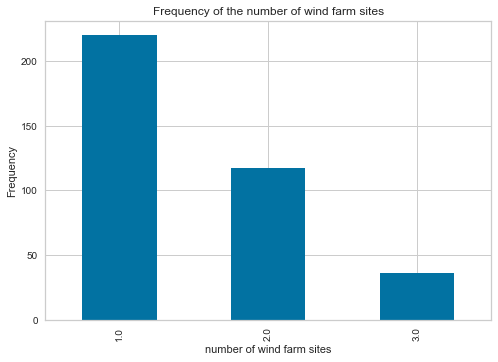

In [23]:
df1= data_fixed[data_fixed['Nb sites Eolien Enedis'] != 0]
frequency = df1['Nb sites Eolien Enedis'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('number of wind farm sites')
plt.ylabel('Frequency')
plt.title('Frequency of the number of wind farm sites')

Text(0.5, 1.0, 'Frequency of the number of hydraulic sites')

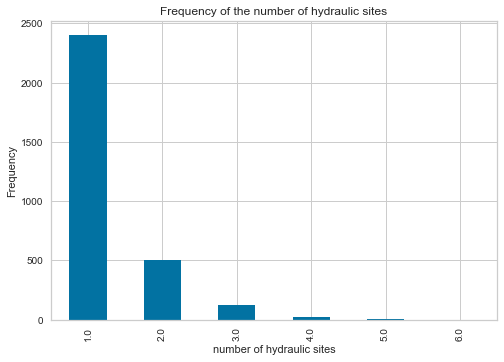

In [24]:
df2= data_fixed[data_fixed['Nb sites Hydraulique Enedis'] != 0]
frequency = df2['Nb sites Hydraulique Enedis'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('number of hydraulic sites')
plt.ylabel('Frequency')
plt.title('Frequency of the number of hydraulic sites')

Text(0.5, 1.0, 'Frequency of the number of bio energie sites')

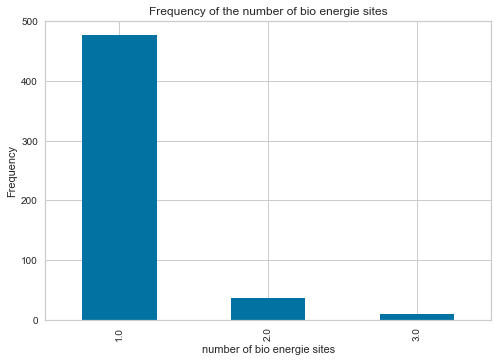

In [25]:
df3= data_fixed[data_fixed['Nb sites Bio Energie Enedis'] != 0]
frequency = df3['Nb sites Bio Energie Enedis'].value_counts()
hist_frequency=frequency.plot.bar()
plt.xlabel('number of bio energie sites')
plt.ylabel('Frequency')
plt.title('Frequency of the number of bio energie sites')

# CLUSTER

In [17]:
data_fixed_2=data_fixed[['Nb sites Photovoltaïque Enedis',
       'Energie produite annuelle Photovoltaïque Enedis (MWh)',
       'Nb sites Eolien Enedis',
       'Energie produite annuelle Eolien Enedis (MWh)',
       'Nb sites Hydraulique Enedis',
       'Energie produite annuelle Hydraulique Enedis (MWh)',
       'Nb sites Bio Energie Enedis',
       'Energie produite annuelle Bio Energie Enedis (MWh)',
       'Nb sites Cogénération Enedis',
       'Energie produite annuelle Cogénération Enedis (MWh)',
       'Nb sites Autres filières Enedis',
       'Energie produite annuelle Autres filières Enedis (MWh)']]

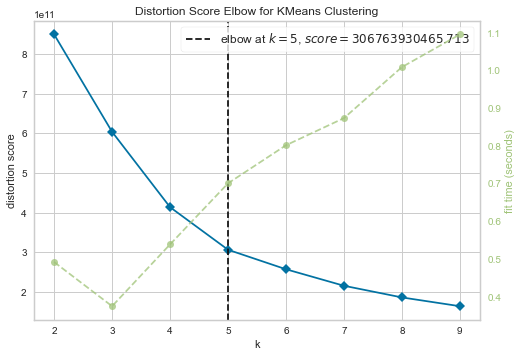

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
model2 = KMeans()
visualizer = KElbowVisualizer(estimator = model2, k = (2,10))
visualizer.fit(data_fixed_2)
visualizer.poof()

In [18]:
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(data_fixed_2)

KMeans(max_iter=100, n_clusters=5)

In [19]:
y_pred = kmeans.predict(data_fixed_2)

In [20]:
data['y_pred']=y_pred

In [31]:
print('silhouette score: ',silhouette_score(data_fixed_2,y_pred))

silhouette score:  0.9355783369708062


In [21]:
data['clusters'] = kmeans.labels_

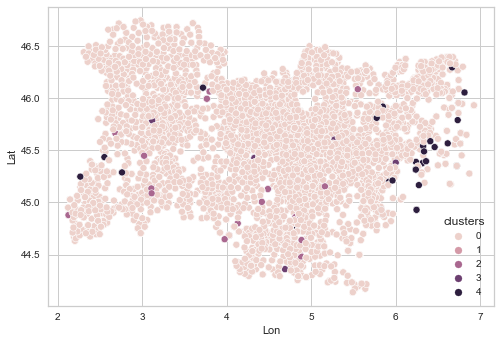

In [33]:
sns.scatterplot(data=data, x='Lon', y='Lat', hue='clusters')
plt.show()

In [34]:
centers = kmeans.cluster_centers_
centers

array([[ 1.49016656e+01,  2.36512396e+02,  5.85406649e-03,
         3.99394660e+01,  1.17778242e-01,  1.74935060e+02,
         1.38337166e-02,  4.02122257e+01,  1.87469510e-02,
         1.19212733e+02,  3.58910029e-03,  6.29251089e-01],
       [-1.77635684e-15, -2.84217094e-14,  0.00000000e+00,
         0.00000000e+00,  3.10000000e+00,  3.39682366e+05,
        -3.46944695e-18, -2.84217094e-14,  1.70000000e+00,
         3.60731511e+04,  0.00000000e+00,  0.00000000e+00],
       [ 5.93607306e-02,  5.55801599e+01,  1.79908676e+00,
         3.36560930e+04,  1.66533454e-16,  2.84217094e-13,
         4.56621005e-02,  4.16675928e+02,  2.08166817e-17,
        -1.13686838e-13, -3.46944695e-18,  1.11022302e-16],
       [ 5.36585366e-01,  9.03322045e+02,  0.00000000e+00,
         1.13686838e-13,  1.21951220e-01,  4.68822472e+02,
         1.31707317e+00,  3.86684650e+04,  7.56097561e-01,
         7.39323500e+03,  2.43902439e-02,  1.76467615e+00],
       [ 4.87012987e-02,  2.19325909e+01, -6.9388939

In [35]:
data.clusters.value_counts()

0    28698
4      308
2      219
3      123
1       10
Name: clusters, dtype: int64

In [22]:
def create_map(data, cluster):
    m = folium.Map(location=[data.Lat.mean(), data.Lon.mean()], zoom_start=9, tiles='OpenStreet Map')
    for _, row in data.iterrows():
        if row[cluster] == 0:
            cluster_colour = '#DAF7A6'
        if row[cluster] == 1:
            cluster_colour = '#FFC300'
        if row[cluster] == 2:
            cluster_colour = '#FF5733'
        if row[cluster] == 3:
            cluster_colour = '#C70039'    
        elif row[cluster] == 4:
            cluster_colour = '#900C3F'
        folium.CircleMarker(
                location= [row['Lat'], row['Lon']],
                radius=2,
                popup= row[cluster],
                color=cluster_colour,
                fill=True,
                fill_color=cluster_colour
            ).add_to(m)
    return m 

In [24]:
## create_map(data, 'clusters')

# TIME SERIES

In [17]:
## Number of photovoltaic sites forecasts

In [18]:
ts=pd.pivot_table(data=data, index=['Année'], values='Nb sites Photovoltaïque Enedis', aggfunc=sum)
ts

,Nb sites Photovoltaïque Enedis
Année,
2011-01-01,25581.0
2012-01-01,29885.0
2013-01-01,34264.0
2014-01-01,37941.0
2015-01-01,40033.0
2016-01-01,43343.0
2017-01-01,46350.0
2018-01-01,52258.0
2019-01-01,57619.0


<AxesSubplot:xlabel='Année'>

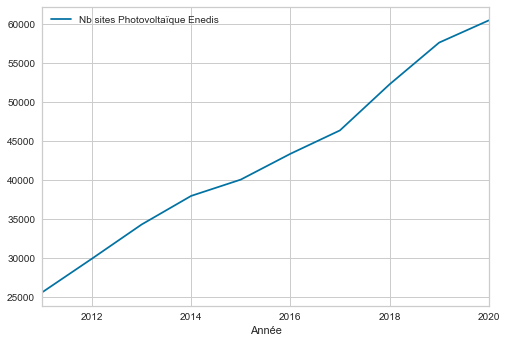

In [19]:
ts.plot()

In [20]:
adf_test=ADFTest(alpha=0.05)
adf_test.should_diff(ts)

(0.07821387184602505, True)

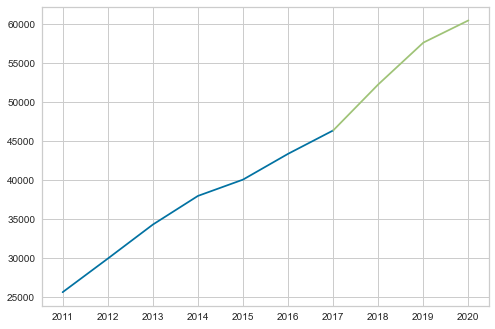

In [21]:
train=ts[:7]
test=ts[-4:]
plt.plot(train)
plt.plot(test)

In [22]:
arima_model=auto_arima(train)

In [23]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -62.797
Date:                Fri, 11 Feb 2022   AIC                            131.593
Time:                        16:03:19   BIC                            131.431
Sample:                             0   HQIC                           129.588
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9574      0.094     20.825      0.000       1.773       2.142
ar.L2         -0.9649      0.103     -9.345      0.000      -1.167      -0.763
sigma2      8.422e+05   1.53e-09    5.5e+14      0.000    8.42e+05    8.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.53   Prob(JB):                         0.88
Heteroskedasticity (H):               1.52   Skew:                            -0.32
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.1e+31. Standard errors may be unstable.
"""

In [24]:
prediction= pd.DataFrame(arima_model.predict(n_periods=4), index=test.index)
prediction.columns=['Photovoltaic sites prediction']
prediction

,Photovoltaic sites prediction
Année,
2017-01-01,48902.294160
2018-01-01,50996.598093
2019-01-01,52633.193550
2020-01-01,53815.801224


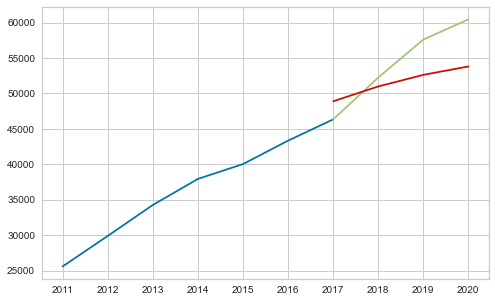

In [25]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Predicted')
plt.show()

In [26]:
test['prediction']=prediction
r2_score(test['Nb sites Photovoltaïque Enedis'], test['prediction'])

<ipython-input-26-730c04248e4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=prediction


0.33645823761277316

In [27]:
## Number of wind farm sites forecasts

In [28]:
ts1=pd.pivot_table(data=data, index=['Année'], values='Nb sites Eolien Enedis', aggfunc=sum)
ts1

,Nb sites Eolien Enedis
Année,
2011-01-01,47.0
2012-01-01,47.0
2013-01-01,47.0
2014-01-01,49.0
2015-01-01,52.0
2016-01-01,56.0
2017-01-01,62.0
2018-01-01,62.0
2019-01-01,68.0


<AxesSubplot:xlabel='Année'>

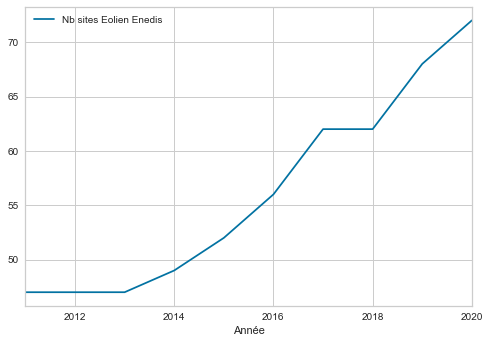

In [29]:
ts1.plot()

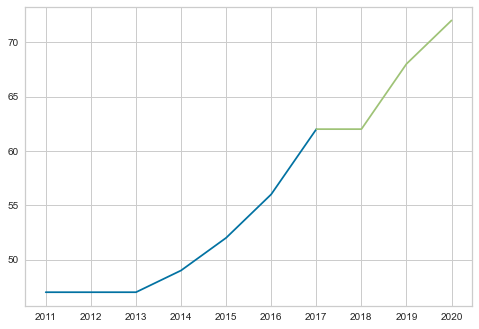

In [30]:
train=ts1[:7]
test=ts1[-4:]
plt.plot(train)
plt.plot(test)

In [31]:
arima_model=auto_arima(train)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -13.399
Date:                Fri, 11 Feb 2022   AIC                             34.799
Time:                        16:03:35   BIC                             34.583
Sample:                             0   HQIC                            32.125
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7405      4.248      1.116      0.264      -3.585      13.066
ar.L1          1.8988      0.131     14.513      0.000       1.642       2.155
ar.L2         -0.9722      0.070    -13.905      0.000      -1.109      -0.835
sigma2         0.8080      0.926      0.873      0.383      -1.006       2.622
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.81   Prob(JB):                         0.87
Heteroskedasticity (H):               1.77   Skew:                             0.16
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
prediction1= pd.DataFrame(arima_model.predict(n_periods=4), index=test.index)
prediction1.columns=['Wind farm sites prediction']
prediction1

,Wind farm sites prediction
Année,
2017-01-01,68.021959
2018-01-01,73.623144
2019-01-01,78.404008
2020-01-01,82.036322


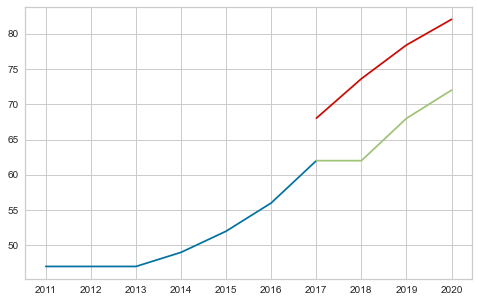

In [33]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction1, label='Predicted')
plt.show()

In [34]:
## Number of wind farm sites forecasts

In [35]:
ts2=pd.pivot_table(data=data, index=['Année'], values='Nb sites Hydraulique Enedis', aggfunc=sum)

<AxesSubplot:xlabel='Année'>

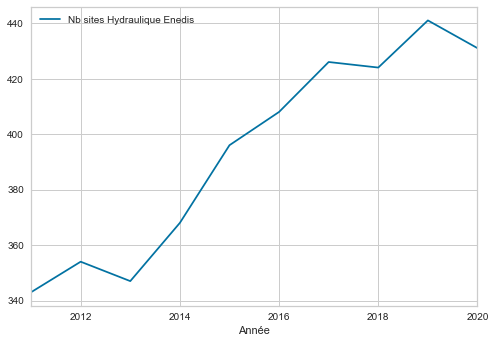

In [36]:
ts2.plot()

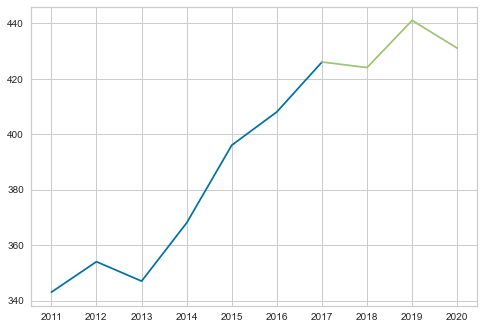

In [37]:
train=ts2[:7]
test=ts2[-4:]
plt.plot(train)
plt.plot(test)

In [38]:
arima_model=auto_arima(train)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    7
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -29.602
Date:                Fri, 11 Feb 2022   AIC                             67.203
Time:                        16:03:49   BIC                             66.987
Sample:                             0   HQIC                            64.529
                                  - 7                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     48.8127     81.794      0.597      0.551    -111.500     209.126
ar.L1          1.4280      0.479      2.983      0.003       0.490       2.366
ar.L2         -0.5546      0.466     -1.190      0.234      -1.468       0.359
sigma2       190.7586    225.061      0.848      0.397    -250.352     631.870
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.32   Prob(JB):                         0.70
Heteroskedasticity (H):               0.88   Skew:                            -0.33
Prob(H) (two-sided):                  0.93   Kurtosis:                         1.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
prediction2= pd.DataFrame(arima_model.predict(n_periods=4), index=test.index)
prediction2.columns=['Hydraulic sites prediction']
prediction2

,Hydraulic sites prediction
Année,
2017-01-01,430.859160
2018-01-01,427.814698
2019-01-01,420.772064
2020-01-01,412.403584


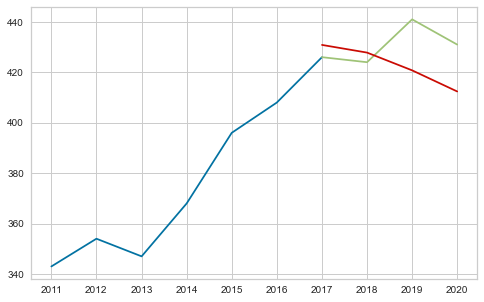

In [40]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction2, label='Predicted')
plt.show()

In [41]:
## Number of bio energie sites forecasts

In [42]:
ts3=pd.pivot_table(data=data, index=['Année'], values='Nb sites Bio Energie Enedis', aggfunc=sum)

<AxesSubplot:xlabel='Année'>

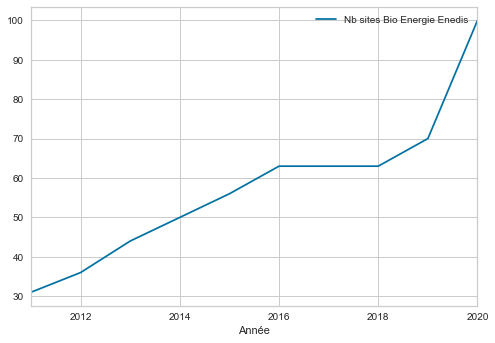

In [43]:
ts3.plot()

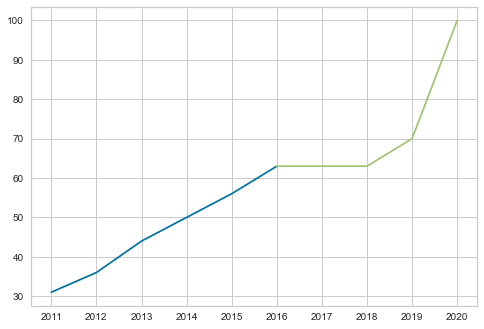

In [44]:
train=ts3[:6]
test=ts3[-5:]
plt.plot(train)
plt.plot(test)

In [45]:
arima_model=auto_arima(train)
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    6
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -15.126
Date:                Fri, 11 Feb 2022   AIC                             38.252
Time:                        16:04:03   BIC                             37.419
Sample:                             0   HQIC                            34.917
                                  - 6                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2101      5.175      1.007      0.314      -4.932      15.353
ar.L1          1.8461      0.169     10.937      0.000       1.515       2.177
ar.L2         -0.9497      0.123     -7.747      0.000      -1.190      -0.709
sigma2         2.8636      4.583      0.625      0.532      -6.119      11.847
===================================================================================
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.41   Prob(JB):                         0.67
Heteroskedasticity (H):               0.69   Skew:                            -0.45
Prob(H) (two-sided):                  0.81   Kurtosis:                         1.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
prediction3= pd.DataFrame(arima_model.predict(n_periods=5), index=test.index)
prediction3.columns=['Bio energie sites prediction']
prediction3

,Bio energie sites prediction
Année,
2016-01-01,68.330328
2017-01-01,71.522717
2018-01-01,72.353979
2019-01-01,70.856799
2020-01-01,67.303470


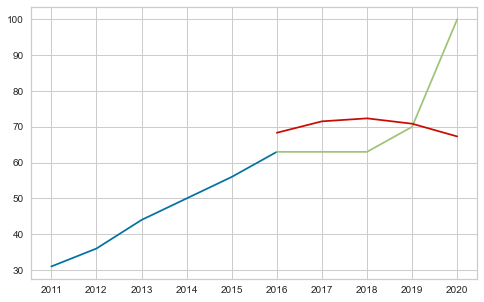

In [47]:
plt.figure(figsize=(8,5))
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction3, label='Predicted')
plt.show()